# Malignant Comments Classifier

In [1]:
# For importing neccessary libraries:-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy as stats
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn
import re
import string

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the csv file:
data=pd.read_csv("train.csv")

In [3]:
# .head used for fetching first five rows of the dataset:- 
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Exploratory Data Analysis (EDA):-

In [4]:
# # For checking how many rows and columns are there in dataset:-
data.shape

(159571, 8)

In [5]:
# For checking the datatypes of each columns:
data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

Here, the column id is unique for all the comments dataset and
it is also not required for model building, so it should be dropped. 

In [6]:
# For fetching the test dataset also:-
df=pd.read_csv("test.csv")

In [7]:
# For fetching the test dataset:-
df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [8]:
# For checking the available columns in the dataset.
data.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [9]:
# For checking the shape of testing dataset:-
df.shape

(153164, 2)

In [10]:
# For checking the available columns in the test dataset.
df.columns

Index(['id', 'comment_text'], dtype='object')

In [11]:
# For checking the Null values in the dataset:-
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

So, Here as seen above, there are no Null values present in the train dataset.

In [12]:
# For checking the datatypes of each columns:
df.dtypes

id              object
comment_text    object
dtype: object

In [13]:
# For checking the information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
# For checking the Null values in the test dataset:-
df.isnull().sum()

id              0
comment_text    0
dtype: int64

Here, also in the test dataset, there are no Null values present in the dataset.

In [15]:
# For checking the unique values in the dataset:
data.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [16]:
# For checking the information regarding the test dataset:-
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [17]:
# lets check the value counts of all the columns in the train dataset
data.value_counts()

id                comment_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [19]:
# For checking the value count of malignant column:-
data['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In this, mostly comments are not malignant as 0 denotes No and 1 denotes Yes. 

In [18]:
# # For checking the value count of high malignant column:-
data['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [19]:
# For checking rude column value counts:-
data['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

Here, only some messages are rude.

In [20]:
# For checking threat column value counts:-
data['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

Here, also very less comments have threat content.

In [21]:
# For checking abuse value counts:-
data['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [22]:
# For checking loathe value counts:-
data['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

In [23]:
# For dropping the column id from train dataset:-
data.drop('id',axis=1,inplace=True)

In [24]:
# For checking few comments present in the train dataset:-
data['comment_text'][9]

'alignment on this subject and which are contrary to those of DuLithgow'

In [25]:
# For checking comments:-
data['comment_text'][27]

"Yes, because the mother of the child in the case against Michael Jackson was studied in here motives and reasonings and judged upon her character just as harshly as Wacko Jacko himself.  Don't tell me to ignore it and incriminate myself.  I am going to continue refuting the bullshit that Jayjg keeps throwing at me.   18:01, 16 Jun 2005 (UTC)"

Here, while observing some comments, 
it is seen that there is a need of text processing as there are many numbers, alphabets and special characters present in the comments which are not required for the model.

In [26]:
# For creating a new column showing length of words in comment_text column:-
data['before_clean']=data['comment_text'].map(lambda comment_text: len(comment_text))
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [27]:
# For creating a new column showing no. of words present in comment_text column in test dataset also:-
df['before_clean']=df['comment_text'].map(lambda comment_text: len(comment_text))
df

,id,comment_text,before_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Processing Text:-

In [28]:
# For downloading recent stopwords and wordnet:-
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\RISHABH
[nltk_data]     JOHRI\AppData\Roaming\nltk_data...


True

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\RISHABH
[nltk_data]     JOHRI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
stop_words=stopwords.words('english')
lemmatizer=wordnet.WordNetLemmatizer()

In [35]:
# For cleaning the messages and removing or replacing some words:-
def edited(text):
    # For converting to lower case:-
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress':-
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    # For Replacing URLs with 'webaddress':-
    text = re.sub(r'http\S+', 'webaddress', text)
    
    # For Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    # For Removing the HTML tags:-
    text = re.sub(r"<.*?>", " ", text)
    
    # For Removing Punctuations:-
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    # For Removing all the non-ascii characters:-
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    # For Removing the unwanted white spaces:-
    text = " ".join(text.split()) 
    
    # For removing '\n' in comment_text column:-
    text= re.sub(r'\n',' ',text)
    
    # For Splitting data into words:-
    tokenized_text = word_tokenize(text)
    
    # For Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text:-
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [39]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\RISHABH
[nltk_data]     JOHRI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\RISHABH
[nltk_data]     JOHRI\AppData\Roaming\nltk_data...


True

In [40]:
# Now executing the above function for the column comment_text in training dataset to replace original with cleaned text:-
data['comment_text'] = data['comment_text'].apply(edited)
data['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [41]:
# For Creating a column 'len_after_cleaning and representing the length of the each comment respectively in a column 'comment_text' after cleaning text:-
data['len_after_cleaning'] = data['comment_text'].map(lambda comment_text: len(comment_text))
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,116,56


now 1 more column has been added which is len_after_cleaning.

In [42]:
# For importing wordcloud:-
!pip install wordcloud

In [43]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [45]:
def wcloud(data, label):
    
    # For printing only rows where the label value is 1 (ie. where comment is Abuse):-
    subset=data[data[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4500)

    wc.generate(" ".join(text))

    plt.figure(figsize=(27,27))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=18)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

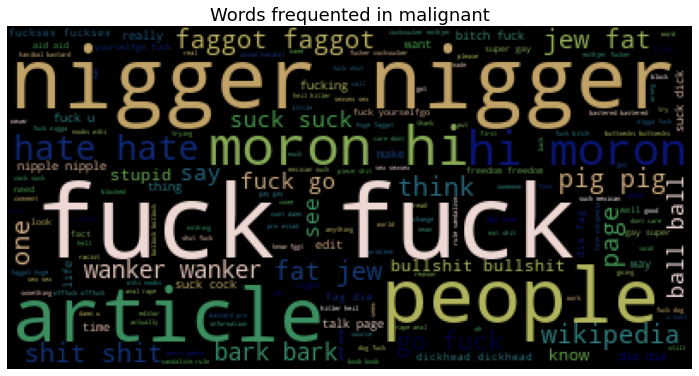

In [46]:
data_m=data.loc[:,['comment_text','malignant']]
wcloud(data_m,'malignant')

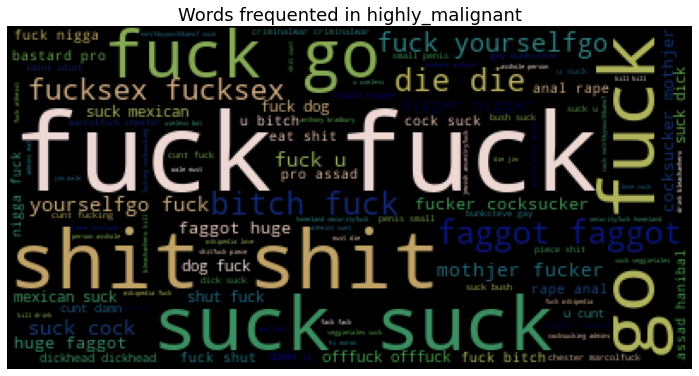

In [47]:
data_hm=data.loc[:,['comment_text','highly_malignant']]
wcloud(data_hm,'highly_malignant')

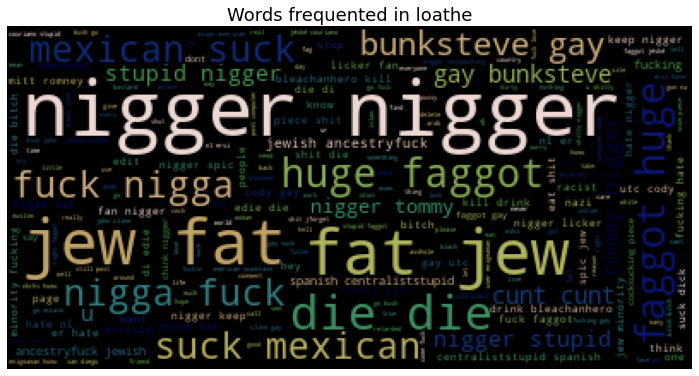

In [48]:
data_loathe=data.loc[:,['comment_text','loathe']]
wcloud(data_loathe,'loathe')

Visualisations:-

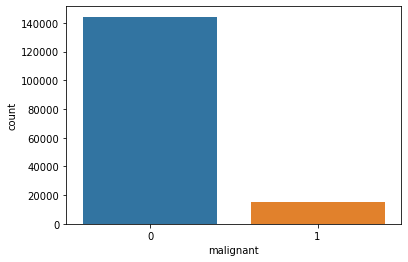

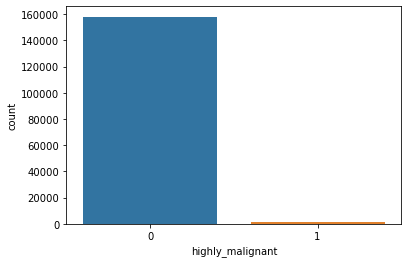

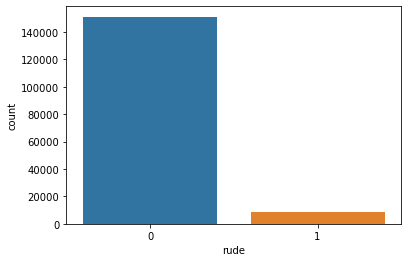

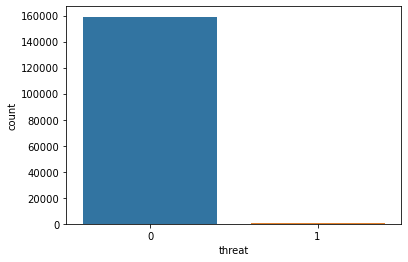

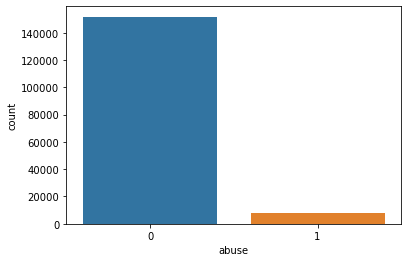

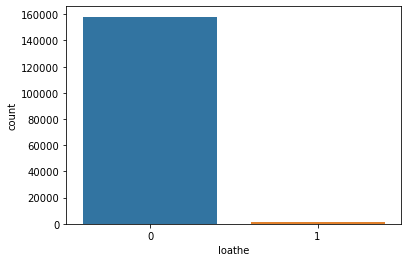

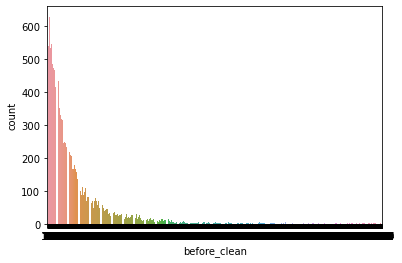

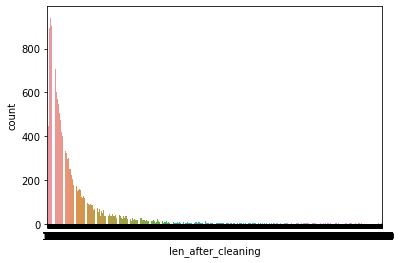

In [49]:
# For plotting all features using countplot:-
feat=data.columns[1:]
for col in feat:
    sns.countplot(data[col])
    plt.show()

Here, in the first graph of malignant we can clearly observe that most of the messages are not malignant.

In the second graph, we can clearly observe that there are very less highly malignant messages.

Same is in third graph, there are few rude comments in the dataset.

In 4th graph, we can clearly see that there are very few cases/almost negligible of threat comments.

In 5th graph, we can clearly see that there are some messages with abusive language.

In [50]:
# For creating a list of feature columns:-
features=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [51]:
# For storing the no. of counts for every target:-
counts=data[features].iloc[:,0:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

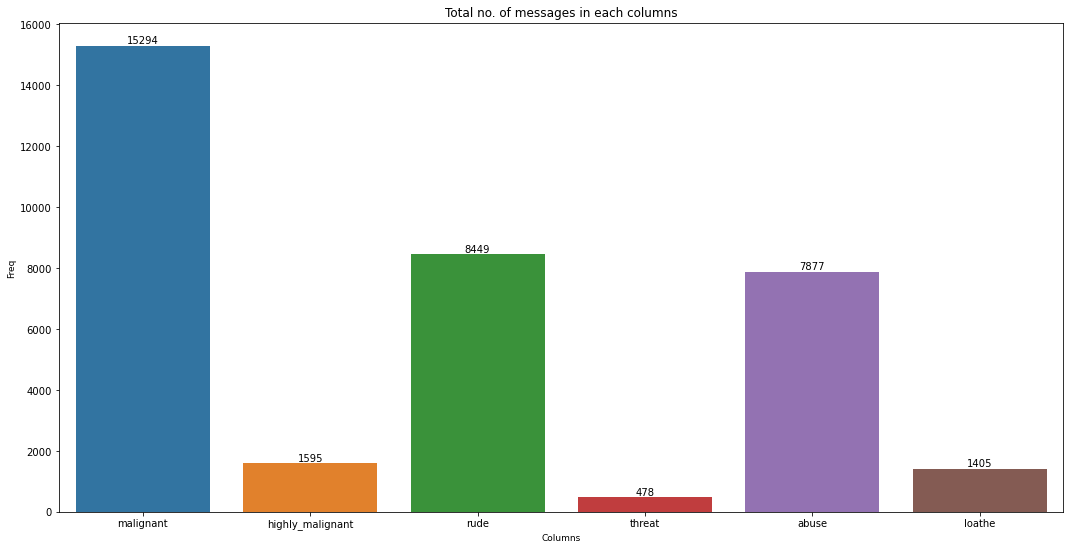

In [52]:
# For plotting and visualizing count of each columns:-
plt.figure(figsize=(18,9))
ax=sns.barplot(counts.index,counts.values)
plt.title("Total no. of messages in each columns")
plt.ylabel('Freq', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values
for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',va='bottom' )
plt.show()

 In this, Maximum comments are in malignant section.

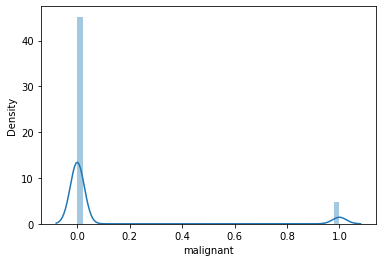

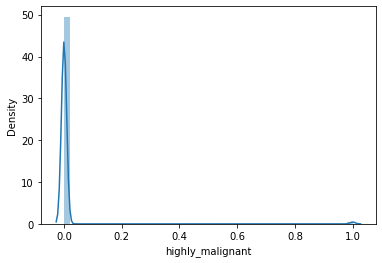

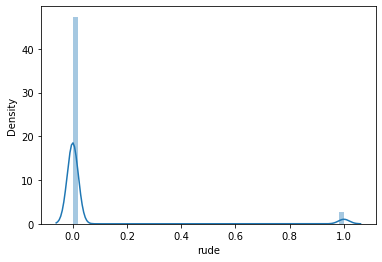

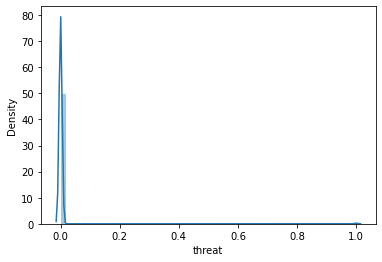

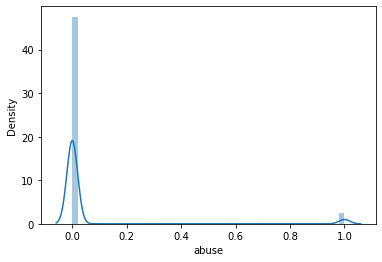

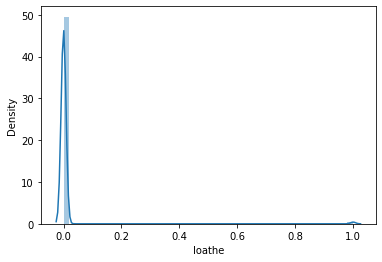

In [53]:
# For checking the distribution of data using distplot:-
for col in data[features].describe().columns:
    sns.distplot(data[features][col])
    plt.show()

Here, the data has been skewed in right.

In [54]:
# For checking the statistical summary of all columns:-
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,241.114238
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,377.602191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,56.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,123.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,263.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000


In this, Low score of std devaiation tells us that the data is not spreaded.and

There is a difference in mean and median which tells us that some sort of skewness is present.

There is very low difference in 75% and max which shows that there are no outliers present in the dataset.

In [55]:
# For checking the correlation amoung all the columns:-
data.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,-0.054413,-0.050770
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.010175,0.015696
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,-0.042910,-0.038521
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,-0.007917,-0.010726
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,-0.045027,-0.040995
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,-0.013628,-0.008135
before_clean,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,1.000000,0.987593
len_after_cleaning,-0.050770,0.015696,-0.038521,-0.010726,-0.040995,-0.008135,0.987593,1.000000


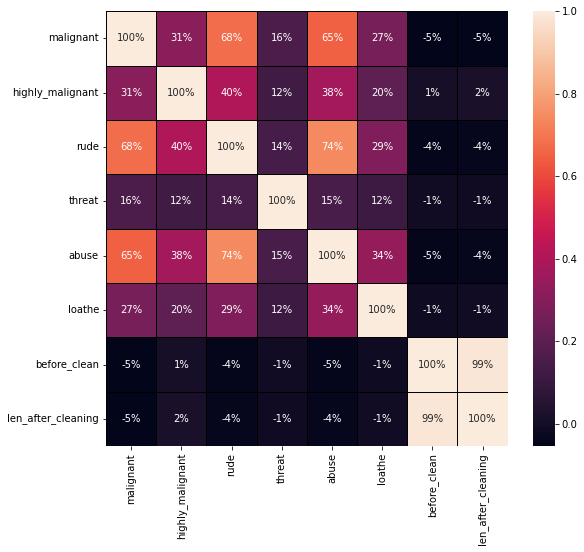

In [57]:
# For visualizing correlation using heatmap also:-
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),linewidth=0.5, linecolor='black',fmt='.0%',annot=True)
plt.show()

# Data Processing:-


In [58]:
# For creating label column in train dataset:-
C_Label= ['malignant','highly_malignant','rude','threat','abuse','loathe']
data[C_Label].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [59]:
data['label']=data[C_Label].sum(axis=1)
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,before_clean,len_after_cleaning,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,156,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,67,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364,0
4,sir hero chance remember page,0,0,0,0,0,0,67,29,0


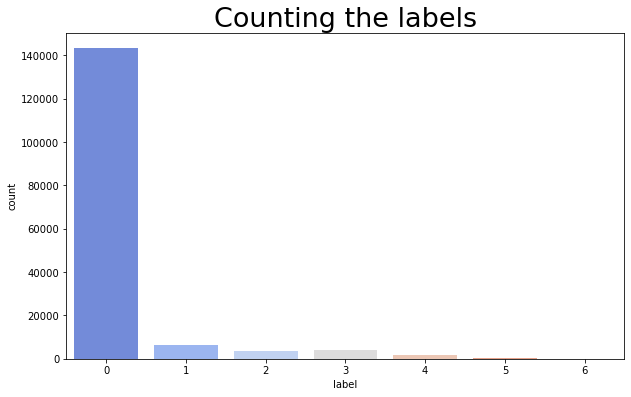

In [60]:
# For Checking the count of labels:-
plt.figure(figsize=(10,6))
sns.countplot(data['label'], palette='coolwarm')
plt.title('Counting the labels',fontsize=27)
plt.show()

# Model Building:-

In [61]:
# For converting text data using TfidfVectorizer and For importing libraries for vectorizer:-
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')

In [62]:
# For Separating the input and output variables represented by X and y respectively in train dataset and converting them:-
X = tfidf.fit_transform(data['comment_text'])

In [63]:
# For converting features into number vectors:-
y=data['label']

In [64]:
# For checking the shape of the dataset:-
print(X.shape,'\t\t',y.shape)

(159571, 14000) 		 (159571,)


In [65]:
# Doing the above process for test data:-
test_vec = tfidf.fit_transform(df['comment_text'])
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

In [69]:
# For Splitting the training and testing dataset:-
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [70]:
# For Checking the shape of x data:-
print(x_train.shape,'\t\t',x_test.shape)

(111699, 14000) 		 (47872, 14000)


In [71]:
# For Checking the shape of y data:-
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


In [76]:
# For Importing the required libraries:-
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# For Initializing the instance of the model:-
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
MNB = MultinomialNB()
SGD = SGDClassifier()

In [78]:
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [83]:
# For checking models with evaluation using OneVsRestClassifier:-
for classifier in [svc,lr,MNB,SGD]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

classifier: LinearSVC
Jaccard score: 0.8478403520284093
Accuracy score: 0.9176554144385026
f1_score: 0.9176554144385026
Precision :  0.9176554144385026
Recall: 0.9176554144385026
Hamming loss:  0.08234458556149733
Confusion matrix:
  [[[ 2850  2018]
  [  257 42747]]

 [[45344   620]
  [ 1573   335]]

 [[46511   317]
  [  907   137]]

 [[45861   748]
  [  657   606]]

 [[47134   210]
  [  431    97]]

 [[47729    27]
  [  108     8]]

 [[47861     2]
  [    9     0]]]

classifier: LogisticRegression
Jaccard score: 0.844458571731299
Accuracy score: 0.9156709558823529
f1_score: 0.9156709558823529
Precision :  0.9156709558823529
Recall: 0.9156709558823529
Hamming loss:  0.08432904411764706
Confusion matrix:
  [[[ 2131  2737]
  [   96 42908]]

 [[45522   442]
  [ 1685   223]]

 [[46676   152]
  [  990    54]]

 [[45991   618]
  [  661   602]]

 [[47261    83]
  [  481    47]]

 [[47751     5]
  [  115     1]]

 [[47863     0]
  [    9     0]]]

classifier: MultinomialNB
Jaccard score: 0.833

As seen above,the LinearSVC is giving highest accuracy as of now and this is the best model, 
so will perform Hyper Parameter tuning on LinearSVC for increasing its accuracy score.

# Hyper Parameter Tuning:-

In [84]:
# For Creating parameter list in GridSearchCV:-
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [ ]:
from sklearn.model_selection import GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,param,cv = 3, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)

In [88]:
Finalmodel = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='hinge',multi_class='crammer_singer', penalty ='l1',intercept_scaling=2))
Finalmodel.fit(x_train,y_train)
y_pred = Finalmodel.predict(x_test)

print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Jaccard score: 0.8479830148619958
Accuracy score: 0.9177389705882353
f1_score: 0.9177389705882353
Precision :  0.9177389705882353
Recall: 0.9177389705882353
Hamming loss:  0.0822610294117647

Confusion matrix: 
 [[[ 2888  1980]
  [  279 42725]]

 [[45465   499]
  [ 1633   275]]

 [[46575   253]
  [  904   140]]

 [[45765   844]
  [  598   665]]

 [[47065   279]
  [  411   117]]

 [[47684    72]
  [  104    12]]

 [[47852    11]
  [    9     0]]]


Here, the accuracy score has been improved to 91.77 % after Hyper Parameter Tuning.

In [91]:
lsvc_prediction=Finalmodel.predict(X)
# Making a dataframe of predictions:-
malignant_prediction=pd.DataFrame({'Predictions':lsvc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


# Saving the Model:-

In [93]:
# For Saving the model:-
import pickle
filename='MalignantCommentsClassifier.pkl'
pickle.dump(Finalmodel,open(filename,'wb'))

In [94]:
# For checking the test data again:-
test_vec

<153164x14000 sparse matrix of type '<class 'numpy.float64'>'
	with 3041271 stored elements in Compressed Sparse Row format>

# Loading the Model for Predictions:-

In [96]:
# For Loading the model:-
FittedModel=pickle.load(open('MalignantCommentsClassifier.pkl','rb'))
FittedModel

OneVsRestClassifier(estimator=LinearSVC(C=2, dual=False, intercept_scaling=2,
                                        loss='hinge',
                                        multi_class='crammer_singer',
                                        penalty='l1'))

In [98]:
# For predicting Test:-
test_results=pd.DataFrame(df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [99]:
# For Train predictions:-
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

In [100]:
# For loading the test data set:-
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [102]:
# Predictions:-
test_prediction=Finalmodel.predict(test_vec)
df=pd.DataFrame({'Predictions':test_prediction})
df

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [103]:
# For saving the predictions:-
test_results=pd.DataFrame(df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [104]:
malignant_prediction.to_csv('Malignant_DataPredictions.csv')

So, The predictions from the test dataset are displayed above and the model has been saved properly.

Thanks